In [1]:
from statsmodels.tsa.arima_model import ARMA
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Superstore.csv", encoding = "ISO-8859-1")
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,21-01-2014,23-01-2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In this data set there are many products with different product categories. So, considering that each product category has different consumer behaviour and different seasonality effect I selected products for a particular category only.

So, to built a forecasting model I require below three columns :

(1) Order Date — > In order to compute the month and Year of transaction

(2) Cateogory — > To select transactions for only particular cateogory

(3) Sales — > Actual Value of sales

In [2]:
sales_data=data[['Order Date','Category','Sales']]
sales_data

,Order Date,Category,Sales
0,08-11-2016,Furniture,261.9600
1,08-11-2016,Furniture,731.9400
2,12-06-2016,Office Supplies,14.6200
3,11-10-2015,Furniture,957.5775
4,11-10-2015,Office Supplies,22.3680
...,...,...,...
9989,21-01-2014,Furniture,25.2480
9990,26-02-2017,Furniture,91.9600
9991,26-02-2017,Technology,258.5760
9992,26-02-2017,Office Supplies,29.6000


Now using Data Frame I will select data where the value of Category is “Technology”

In [3]:
tech_sales_data = sales_data[(sales_data['Category'] == "Technology")]
tech_sales_data

,Order Date,Category,Sales
7,09-06-2014,Technology,907.152
11,09-06-2014,Technology,911.424
19,27-08-2014,Technology,213.480
26,16-01-2016,Technology,90.570
35,08-12-2016,Technology,1097.544
...,...,...,...
9983,22-09-2016,Technology,97.980
9986,29-09-2016,Technology,36.240
9987,17-11-2017,Technology,79.990
9988,17-11-2017,Technology,206.100


Now, I will create three new column in Pandas Data Frame :

(1) Date – Contains Orde Date in datetime format form which Month & Year can be fetched

(2) year – Fetched from Date Column created above

(3) month – Fetched from Date column created above

In [4]:
tech_sales_data['date']=pd.to_datetime(tech_sales_data['Order Date'])
tech_sales_data['year'],tech_sales_data['month'] = tech_sales_data['date'].dt.year , tech_sales_data['date'].dt.month
tech_sales_data

<ipython-input-4-87a5a58fdc9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_sales_data['date']=pd.to_datetime(tech_sales_data['Order Date'])
<ipython-input-4-87a5a58fdc9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_sales_data['year'],tech_sales_data['month'] = tech_sales_data['date'].dt.year , tech_sales_data['date'].dt.month


,Order Date,Category,Sales,date,year,month
7,09-06-2014,Technology,907.152,2014-09-06,2014,9
11,09-06-2014,Technology,911.424,2014-09-06,2014,9
19,27-08-2014,Technology,213.480,2014-08-27,2014,8
26,16-01-2016,Technology,90.570,2016-01-16,2016,1
35,08-12-2016,Technology,1097.544,2016-08-12,2016,8
...,...,...,...,...,...,...
9983,22-09-2016,Technology,97.980,2016-09-22,2016,9
9986,29-09-2016,Technology,36.240,2016-09-29,2016,9
9987,17-11-2017,Technology,79.990,2017-11-17,2017,11
9988,17-11-2017,Technology,206.100,2017-11-17,2017,11


I will now build a model to forecast monthly average sales of a product.

So, in data preparation we will group data based on year and month and aggregate it using mean() function in Pandas Data Frame

After aggregating, we will select the data excluding the year 2017 to get the training Data set

In [15]:
mean_sales=tech_sales_data.groupby(['year', 'month'],as_index=False).mean()
means_sales_train = mean_sales[(mean_sales['year']!=2017)]
means_sales_train

,year,month,Sales
0,2014,1,494.145882
1,2014,2,247.871520
2,2014,3,1433.556609
3,2014,4,554.442941
4,2014,5,245.006452
5,2014,6,303.543667
6,2014,7,257.149786
7,2014,8,645.598154
8,2014,9,609.239500
9,2014,10,513.367440


In order to feed the training Data set in to ARMA function imported from statsmodel library, I need to convert it to a python list

There are two parameters passed to ARMA function. First is tranining Data set and second is order. Here order is taken as (0,10) based on our training Data.

Model is then fitted or trained.

'yhat' is a variable on which predictions or forecasts are stored. In the predict funciton I will pass on two indices based on which the number of future forecasts are made. Like in below code the difference between two indices plus one will give the number of forecasts. In below code 12 future forecasts will be made

In [16]:
sales = means_sales_train['Sales'].tolist()
model = ARMA(sales, order=(0, 10))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(sales), len(sales)+11)
print(yhat)

[317.44237998 123.26150604 485.82240436 713.96947437 596.13041765
 443.3939898  429.80788252 517.5096194  553.24377605 487.30568514
 485.82569846 485.82569846]


Now I have 'yhat' where the forecated sales is stored.

In the varibale 'actual' we will store the sales for the year 2018 which we can compare with forecasted sales value.

Since we have 12 predicted values so the varibale x_axis will have value for x_axis where we will plot actual and forecasted sales.

We will use matplotlib library to plot actual vs forecasted sales.

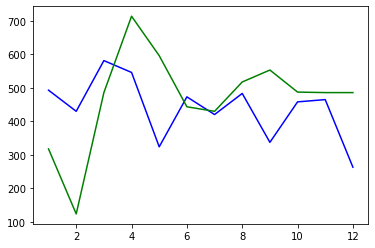

In [17]:
actual = mean_sales[(mean_sales['year']==2017)]['Sales'].tolist()
x_axis = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(x_axis,actual,color='blue')
plt.plot(x_axis,yhat,color='green')